In [24]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pd.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [25]:
data['Day'] = data['Timestamp'].dt.date
#data['Day'] = data['Timestamp'].dt.mnoth
#data.head() 
day_average = data.groupby(['Day']).mean()
list(day_average.index)



[datetime.date(2018, 1, 1),
 datetime.date(2018, 1, 2),
 datetime.date(2018, 1, 3),
 datetime.date(2018, 1, 4),
 datetime.date(2018, 1, 5),
 datetime.date(2018, 1, 6),
 datetime.date(2018, 1, 7),
 datetime.date(2018, 1, 8),
 datetime.date(2018, 1, 9),
 datetime.date(2018, 1, 10),
 datetime.date(2018, 1, 11),
 datetime.date(2018, 1, 12),
 datetime.date(2018, 1, 13),
 datetime.date(2018, 1, 14),
 datetime.date(2018, 1, 15),
 datetime.date(2018, 1, 16),
 datetime.date(2018, 1, 17),
 datetime.date(2018, 1, 18),
 datetime.date(2018, 1, 19),
 datetime.date(2018, 1, 20),
 datetime.date(2018, 1, 21),
 datetime.date(2018, 1, 22),
 datetime.date(2018, 1, 23),
 datetime.date(2018, 1, 24),
 datetime.date(2018, 1, 25),
 datetime.date(2018, 1, 26),
 datetime.date(2018, 1, 27),
 datetime.date(2018, 1, 28),
 datetime.date(2018, 1, 29),
 datetime.date(2018, 1, 30),
 datetime.date(2018, 1, 31),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 3),
 datetime.date(2018, 2, 4)

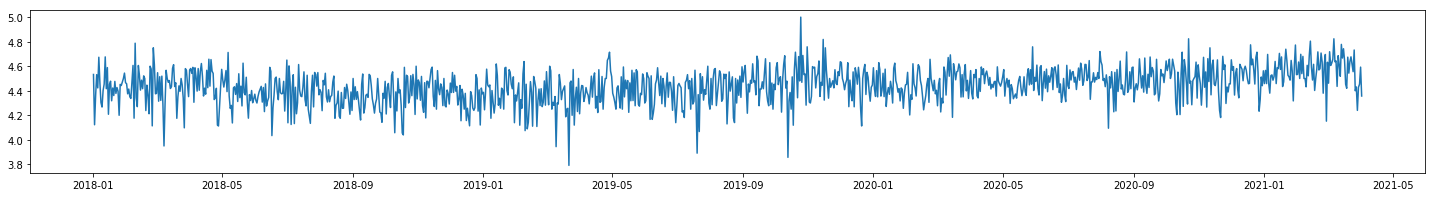

In [26]:
plt.figure(figsize = (25, 3))
plt.plot(day_average.index, day_average['Rating'])

In [27]:
day_average['Rating'].min()

3.7916666666666665

##### Downsampling and Plotting Average Ratings by Week

In [54]:
#Rating Average by week

data['week'] = data['Timestamp'].dt.strftime('%Y-%U')
# data['week'].max() = 53
#data['week'].min() = 1
#data['week']
week_average =data.groupby(['week']).mean()
week_average[:20]

,Rating
week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
2018-05,4.448805
2018-06,4.463462
2018-07,4.406810
2018-08,4.429134


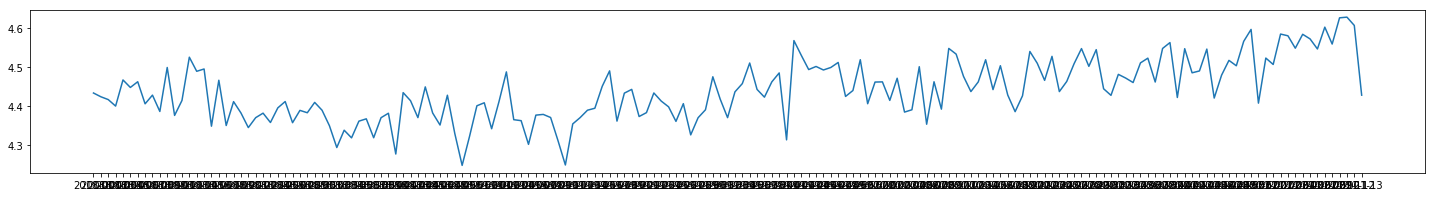

In [55]:
plt.figure(figsize=(25,3))
plt.plot(week_average.index, week_average ['Rating'])

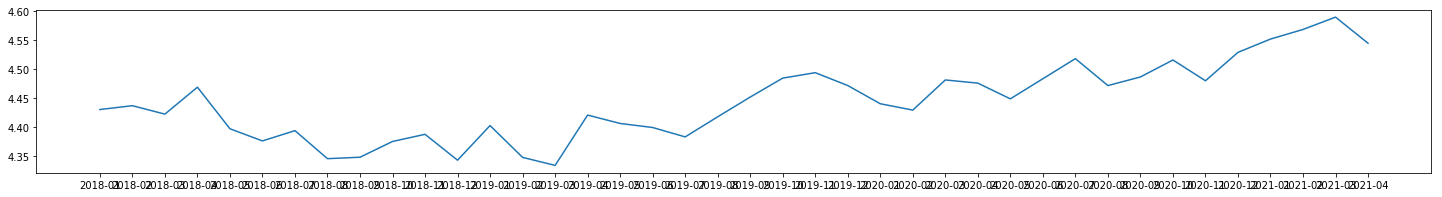

In [56]:

# Avaraginging by month

data['month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average =data.groupby(['month']).mean()

plt.figure(figsize=(25,3))
plt.plot(month_average.index, month_average['Rating'])

In [57]:
month_average.head()

,Rating
month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420


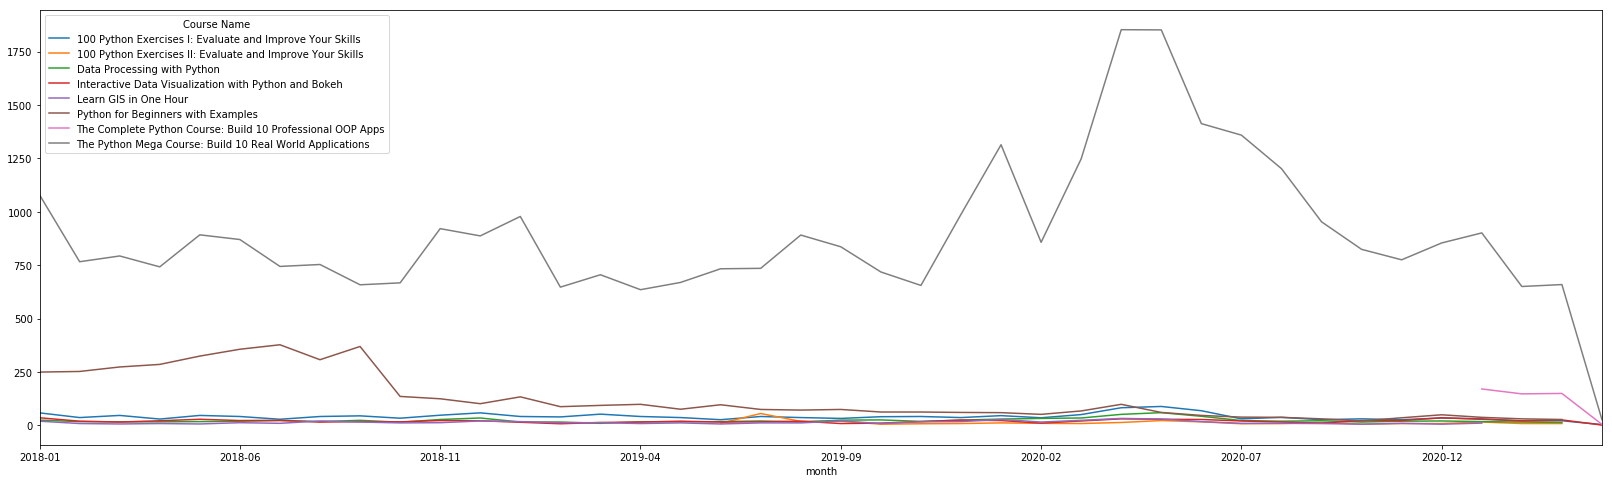

In [64]:
# Avaraginging by month by course
data['month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['month', 'Course Name'])['Rating'].count().unstack()

month_average_crs.plot(figsize=(28, 8))

##### What day are people the happiest

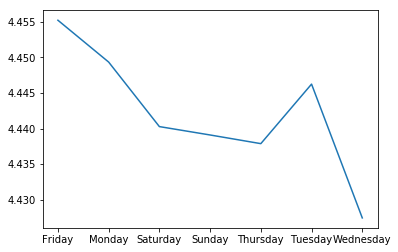

In [68]:
data['weekday'] = data['Timestamp'].dt.strftime('%A')
weekday_average =data.groupby(['weekday']).mean()
plt.plot(weekday_average.index, weekday_average['Rating'])

In [71]:
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')
weekday_average = weekday_average.sort_values('weekday')
weekday_average

,Rating
weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452
